### "Oh, Bother!" - Winnie the Pooh
<img src="https://d23.com/app/uploads/2017/01/1180w-600h_011817_winnie-the-pooh-quote-shareables.jpg">

In [143]:
# Importing all of the libraries that are used for the project
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import circlify
from IPython.display import IFrame

In [144]:
# Reading in CSV files and converting them into Pandas DataFrames
bee_data = pd.read_csv('bee_census_data.csv')

us_data = pd.read_csv('us_census_data.csv')

In [145]:
# Changing data type so that values can be used for numerical calculations
bee_data['Value'] = pd.to_numeric(bee_data['Value'], errors='coerce')
bee_data.head()


,Year,Period,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Value,CV (%)
0,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,119.0,27.7
1,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,65.0,27.7
2,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,190.0,27.7
3,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,GREENE,63.0,14.0,27.7
4,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,HALE,65.0,10.0,27.7


In [146]:
# Only interested in the total estimated population for purposes of calculation so all other columns are unnecessary
year_select = bee_data[bee_data['Year'].between(2010,2012)]
clean_bee_data = year_select.groupby('State')['Value'].mean().reset_index()
clean_bee_data.rename(columns={'Value': 'BEEPOP'}, inplace=True)
avg_colony_pop = 60000
clean_bee_data['BEEPOP'] = clean_bee_data['BEEPOP'].astype(float) * avg_colony_pop
clean_bee_data

,State,BEEPOP
0,ALABAMA,9.142500e+06
1,ALASKA,1.092000e+07
2,ARIZONA,1.620000e+07
3,ARKANSAS,6.058500e+06
4,CALIFORNIA,1.639412e+07
5,COLORADO,9.944348e+06
6,CONNECTICUT,3.496286e+07
7,DELAWARE,1.634000e+07
8,FLORIDA,1.524000e+07
9,GEORGIA,4.926353e+06


In [147]:
# Display the second Data Frame
us_data.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [148]:
# Again, only interested in total estimated population
us_data['USPOP'] = us_data[['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012']].mean(axis=1).astype(float)
clean_us_data = us_data[['NAME', 'USPOP']].copy()
clean_us_data = clean_us_data.iloc[5:]
clean_us_data['NAME'] = clean_us_data['NAME'].str.upper()
clean_us_data

,NAME,USPOP
5,ALABAMA,4.800031e+06
6,ALASKA,7.221603e+05
7,ARIZONA,6.478264e+06
8,ARKANSAS,2.938265e+06
9,CALIFORNIA,3.763556e+07
10,COLORADO,5.120368e+06
11,CONNECTICUT,3.587315e+06
12,DELAWARE,9.073843e+05
13,DISTRICT OF COLUMBIA,6.199833e+05
14,FLORIDA,1.906553e+07


In [149]:
# Merging the two Data Frames and dropping null values
combined_data = pd.merge(clean_bee_data, clean_us_data, left_on='State', right_on='NAME', how='outer')
combined_data.insert(0, 'STATE', combined_data['State'])
combined_data.drop(['State', 'NAME'], axis=1, inplace=True)
combined_data.dropna(inplace=True)
combined_data = pd.DataFrame({'STATE': combined_data['STATE'], 'BEEPOP': combined_data['BEEPOP'], 'USPOP': combined_data['USPOP']})
combined_data.head()


,STATE,BEEPOP,USPOP
0,ALABAMA,9.142500e+06,4.800031e+06
1,ALASKA,1.092000e+07,7.221603e+05
2,ARIZONA,1.620000e+07,6.478264e+06
3,ARKANSAS,6.058500e+06,2.938265e+06
4,CALIFORNIA,1.639412e+07,3.763556e+07


In [150]:
# Create a pivot table
pivot_table = pd.pivot_table(combined_data, index='STATE', values=['BEEPOP', 'USPOP'])
def format_millions(x):
    return f'{x / 1000000:.1f}M'


pivot_table['BEEPOP'] = pivot_table['BEEPOP'].apply(format_millions)
pivot_table['USPOP'] = pivot_table['USPOP'].apply(format_millions)
print(pivot_table)

               BEEPOP  USPOP
STATE                       
ALABAMA          9.1M   4.8M
ALASKA          10.9M   0.7M
ARIZONA         16.2M   6.5M
ARKANSAS         6.1M   2.9M
CALIFORNIA      16.4M  37.6M
COLORADO         9.9M   5.1M
CONNECTICUT     35.0M   3.6M
DELAWARE        16.3M   0.9M
FLORIDA         15.2M  19.1M
GEORGIA          4.9M   9.8M
HAWAII          36.2M   1.4M
IDAHO            6.3M   1.6M
ILLINOIS         6.1M  12.9M
INDIANA          6.4M   6.5M
IOWA             4.3M   3.1M
KANSAS           4.8M   2.9M
KENTUCKY         6.4M   4.4M
LOUISIANA        8.2M   4.6M
MAINE            8.9M   1.3M
MARYLAND         6.6M   5.8M
MASSACHUSETTS   16.8M   6.6M
MICHIGAN        13.2M   9.9M
MINNESOTA        7.3M   5.3M
MISSISSIPPI      5.9M   3.0M
MISSOURI         5.1M   6.0M
MONTANA          1.5M   1.0M
NEBRASKA         7.4M   1.8M
NEVADA          11.9M   2.7M
NEW HAMPSHIRE    9.2M   1.3M
NEW JERSEY      15.0M   8.8M
NEW MEXICO       8.6M   2.1M
NEW YORK        16.7M  19.5M
NORTH CAROLINA

In [151]:
# Creating a final Data Frame to include only the two totals 
sum_1 = combined_data['BEEPOP'].sum() / 1000000
sum_2 = combined_data['USPOP'].sum() / 1000000        

totals_data = pd.DataFrame({
    '': ['UnitedStates'],
    'BEETOTAL': [sum_1],
    'USTOTAL': [sum_2]
})


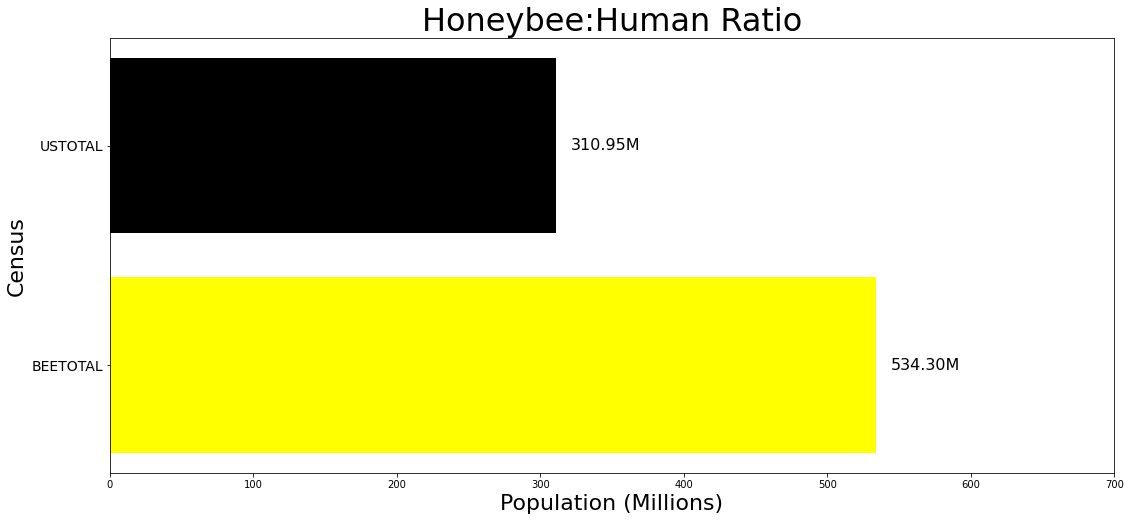

In [152]:
# Graphing the totals as comparison
categories = totals_data.columns[1:3]
values = totals_data.values[0][1:3]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Define the colors for the bars
colors = ['yellow', 'black']

# Plot the horizontal bar chart with different colors
bars = ax.barh(categories, values, color=colors)

# Set the axis labels and title
ax.set_xlabel('Population (Millions)', font=dict(size=22, family='Arial, bold'))
ax.set_ylabel('Census', font=dict(size=22, family='Arial, bold'))
ax.set_title('Honeybee:Human Ratio', font=dict(size=32, family='Arial, bold'))
ax.set_xlim(right=700)

# Add annotations for the numerical values
for i, bar in enumerate(bars):
    value = values[i]
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x() + width + 10
    y = bar.get_y() + height / 2
    ax.text(x, y, f'{value:.2f}M'.format(x / 1000000), ha='left', va='center', font=dict(size=16, family='Arial, bold'))
ax.tick_params(axis='y', labelsize=14)
# Display the plot
plt.show()

In [153]:
#Illustrating the ratio of the two populations
total_human_population = combined_data['USPOP'].sum() / 1000000
total_honeybee_population = combined_data['BEEPOP'].sum() / 1000000

ratio = total_honeybee_population / total_human_population
formatted_ratio = "{:.1f}".format(ratio)

# Create labels for each bubble
labels = [
    f"Total Human Population: {total_human_population:.1f}M",
    f"Total Honeybee Population: {total_honeybee_population:.1f}M"
]

# Create a DataFrame for the total population data
totals_data = pd.DataFrame({
    'Label': labels,
    'Population': [total_human_population, total_honeybee_population]
})

# Use circlify to compute circle positions without repulsion to preserve manual adjustments
circles = circlify.circlify(totals_data['Population'].tolist(), target_enclosure=circlify.Circle(x=0, y=0, r=1.5), show_enclosure=False)

# Sort the circles based on their y-coordinate (from top to bottom)
circles.sort(key=lambda circle: circle.y, reverse=True)

# Adjust the positions of bubbles to prevent overlapping and increase separation
y_offsets = [1.0, 0.6]  # Set desired y-offsets for the two circles
adjusted_circles = [(circle.x, circle.y + y_offsets[i], circle.r) for i, circle in enumerate(circles)]

# Create the trace for the bubble chart
trace = go.Scatter(
    x=[circle[0] for circle in adjusted_circles],
    y=[circle[1] for circle in adjusted_circles],
    mode='markers+text',
    marker=dict(
        color=['black', 'yellow'],  # Set the colors for the bubbles
        size=[circle[2] * 600 for circle in adjusted_circles],  # Set the sizes of the bubbles (adjust the scaling factor)
        sizemode='diameter',  # Use diameter mode to specify bubble sizes directly
    ),
)

# Create the layout for the circle packing effect
layout = go.Layout(
    title=dict(text='Honeybee:Human Ratio', font=dict(size=32, family='Arial, bold')),  # Set the title font size
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    showlegend=False,
    width=900,
    height=900,
)

# Create the figure and add the trace to it
fig = go.Figure(data=[trace], layout=layout)

# Update the annotations to position them correctly
annotations = []
for i, circle in enumerate(adjusted_circles):
    label = labels[i]
    x = circle[0]
    y = circle[1]
    if i == 0:
        y += 1.0  
    if i == 1:
        y -= 1.3# Adjust this value to set the desired y-coordinate for the second label

    annotation = dict(
        x=x,
        y=y,
        xref="x",
        yref="y",
        text=label,
        showarrow=False,  # Remove the arrow
        font=dict(size=14, family='Arial, bold')
    )

    annotations.append(annotation)

fig.update_layout(annotations=annotations)

# Show the circle packing bubble chart
fig.show()
formatted_ratio
# When running this program you may see two instances of the bubble chart visualization. The second one has been imbedded in a markdown cell due to GitHub's inability to preview the graph

'1.7'

![Preview](newplot.png)

In [154]:
# Here I am exporting the two clean data sets as CSV files so that I can then create the following Tableau Worksheet.
clean_bee_data.to_csv('clean_bee_data.csv', index=False)
clean_us_data.to_csv('clean_us_data.csv', index=False)


dashboard_url = 'https://public.tableau.com/authoring/HoneybeeProject/Sheet1#1'
iframe = IFrame(dashboard_url, width=1000, height=800)
display(iframe)